<a href="https://colab.research.google.com/github/Mouhamed-Ndiaye27/Pr-diction-du-prix-d-ordinateur-portable-/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **I. Importation des Bibliotéques Nécessaires**

In [2]:
# Cellule 1 : Importation des bibliotèques nécessaires
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import os
import multiprocessing
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow import keras
import plotly.express as px
from tensorflow.keras import layers, models

## **II. Chargement et Lecture du dataset Agricultural-crops**

In [3]:
# Cellule 2 : Chargement des données
from google.colab import drive
drive.mount('/content/drive')
import os

path = '/content/drive/MyDrive/Agricultural-crops'
file_name = os.listdir(path)

# Lecture des sous-dossiers (classes)
key_value = dict()
for i in os.listdir(path):
    key_value[i] = os.listdir(path + '/' + i)


Mounted at /content/drive


In [4]:
print(file_name)

# Cellule 3 : Construction du DataFrame
df = []
for key in key_value.keys():
    for j in key_value[key]:
        df.append([key, path + '/' + key + '/' + j])
df1 = pd.DataFrame(df, columns=('label', 'path'))
df1.head()


['coconut', 'Cherry', 'Cucumber', 'chilli', 'almond', 'banana', 'clove', 'Coffee-plant', 'cardamom', 'cotton', 'jute', 'mustard-oil', 'Olive-tree', 'jowar', 'Fox_nut(Makhana)', 'Lemon', 'Pearl_millet(bajra)', 'maize', 'gram', 'papaya', 'sugarcane', 'vigna-radiati(Mung)', 'pineapple', 'sunflower', 'tomato', 'soyabean', 'Tobacco-plant', 'wheat', 'rice', 'tea']


label                                               path
0  coconut  /content/drive/MyDrive/Agricultural-crops/coco...
1  coconut  /content/drive/MyDrive/Agricultural-crops/coco...
2  coconut  /content/drive/MyDrive/Agricultural-crops/coco...
3  coconut  /content/drive/MyDrive/Agricultural-crops/coco...
4  coconut  /content/drive/MyDrive/Agricultural-crops/coco...

In [5]:
# Comptez les images par classe
classes=file_name
class_counts = {
    cls: len(os.listdir(os.path.join(path, cls)))
    for cls in classes
}

# Convertir en DataFrame pour utilisation avec Plotly
df_counts = pd.DataFrame(list(class_counts.items()), columns=["Classe", "Nombre d'images"])

# Affichage du DataFrame
print(df_counts)

                 Classe  Nombre d'images
0               coconut               25
1                Cherry               32
2              Cucumber               31
3                chilli               23
4                almond               21
5                banana               31
6                 clove               30
7          Coffee-plant               29
8              cardamom               22
9                cotton               32
10                 jute               23
11          mustard-oil               28
12           Olive-tree               30
13                jowar               30
14     Fox_nut(Makhana)               23
15                Lemon               28
16  Pearl_millet(bajra)               39
17                maize               31
18                 gram               25
19               papaya               23
20            sugarcane               25
21  vigna-radiati(Mung)               27
22            pineapple               25
23            su

In [6]:
# Cellule 4 : Fonction pour lire et redimensionner les images
def read(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (224, 224))
    return img

In [7]:
# Cellule 5 : Chargement des images avec multiprocessing
with multiprocessing.Pool(4) as p:
    images = p.map(read, df1['path'])

images = np.array(images, dtype='float')

##**III. Vérification et Exploration des Classes**

In [8]:
# Visualisation interactive de la distribution des classes
fig = px.bar(
    df_counts,
    x="Classe",
    y="Nombre d'images",
    title="Distribution des images par classe",
    color="Nombre d'images",
    text="Nombre d'images",
    labels={"Classe": "Type de culture", "Nombre d'images": "Nombre d'images"},
)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()
print(df_counts.head())

     Classe  Nombre d'images
0   coconut               25
1    Cherry               32
2  Cucumber               31
3    chilli               23
4    almond               21


#**IV. Chargement et Prétraitement des Images**
Le chargement des images avec cv2 et multiprocessing.

In [9]:
# Je vais  :
# Normaliser les images.
# Ajouter une colonne dans votre DataFrame pour stocker les données en mémoire.
# Ajout de normalisation et d'intégration au DataFrame :

# Normalisation des images
images = images / 255.0  # Les valeurs seront dans [0, 1]

# Ajout des images en mémoire dans le DataFrame
df1['image'] = list(images)

#**V. Visualisation d'Échantillons d'Images**

In [10]:
# Pour chaque classe, Je  vais afficher quelques exemples avec Plotly.

# Visualisation d'échantillons d'images
def plot_samples(df, num_samples=1):
    samples = df.groupby('label').apply(lambda x: x.sample(num_samples))
    fig = px.imshow(
        np.hstack([np.array(sample['image']) for _, sample in samples.iterrows()]),
        title="Échantillons d'images par classe",
    )
    fig.show()

# Afficher 1 exemple par classe
plot_samples(df1[:100])
plot_samples(df1[100:200])
plot_samples(df1[200:300])
plot_samples(df1[300:500])
plot_samples(df1[700:])

<ipython-input-10-00dc4a4151b2>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



<ipython-input-10-00dc4a4151b2>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



<ipython-input-10-00dc4a4151b2>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



<ipython-input-10-00dc4a4151b2>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



<ipython-input-10-00dc4a4151b2>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



#**VI. Division du Dataset**

In [11]:
# Création des ensembles d'entraînement, validation et test
train, temp = train_test_split(df1, test_size=0.3, stratify=df1['label'], random_state=42)
val, test = train_test_split(temp, test_size=0.5, stratify=temp['label'], random_state=42)

print(f"Entrainement: {len(train)} images, Validation: {len(val)} images, Test: {len(test)} images")

Entrainement: 580 images, Validation: 124 images, Test: 125 images


#**VII. Augmentation des Données avec ImageDataGenerator**

In [12]:
# Je vais  utiliser Keras ImageDataGenerator pour augmenter les images d'entraînement.
# Cela permettra de générer des transformations aléatoires des images et d'améliorer la généralisation de votre modèle.



# Définir un générateur pour l'entraînement avec augmentation des données
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation des pixels
    rotation_range=40,  # Rotation aléatoire des images
    width_shift_range=0.2,  # Déplacement horizontal aléatoire
    height_shift_range=0.2,  # Déplacement vertical aléatoire
    shear_range=0.2,  # Cisaillement des images
    zoom_range=0.2,  # Zoom aléatoire
    horizontal_flip=True,  # Retourner horizontalement les images
    fill_mode='nearest'  # Remplir les pixels vides après transformation
)

# Définir un générateur pour la validation sans augmentation des données
val_datagen = ImageDataGenerator(rescale=1./255)  # Normalisation des pixels pour la validation

# Charger les données d'entraînement depuis le répertoire 'train' (les sous-dossiers sont les classes)
train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(224, 224),  # Redimensionner les images à 224x224 pour MobileNetV2
    batch_size=32,  # Taille du batch
    class_mode='categorical',  # Le mode d'étiquetage pour plusieurs classes
    shuffle=True  # Mélanger les images
)

# Charger les données de validation depuis le répertoire 'val'
val_generator = val_datagen.flow_from_directory(
    path,  # Remplacez par le chemin vers votre dataset
    target_size=(224, 224),  # Redimensionner les images à 224x224
    batch_size=32,  # Taille du batch
    class_mode='categorical',  # Le mode d'étiquetage pour plusieurs classes
    shuffle=False  # Pas de mélange pour les données de validation
)

# Vérification des classes et des étiquettes
print(f"Classes : {train_generator.class_indices}")

Found 829 images belonging to 30 classes.
Found 829 images belonging to 30 classes.
Classes : {'Cherry': 0, 'Coffee-plant': 1, 'Cucumber': 2, 'Fox_nut(Makhana)': 3, 'Lemon': 4, 'Olive-tree': 5, 'Pearl_millet(bajra)': 6, 'Tobacco-plant': 7, 'almond': 8, 'banana': 9, 'cardamom': 10, 'chilli': 11, 'clove': 12, 'coconut': 13, 'cotton': 14, 'gram': 15, 'jowar': 16, 'jute': 17, 'maize': 18, 'mustard-oil': 19, 'papaya': 20, 'pineapple': 21, 'rice': 22, 'soyabean': 23, 'sugarcane': 24, 'sunflower': 25, 'tea': 26, 'tomato': 27, 'vigna-radiati(Mung)': 28, 'wheat': 29}


#**VIII. Création du Modèle avec MobileNetV2**

In [13]:
# # Je vais  intégrer MobileNetV2 pour la classification des images, en l'utilisant avec une technique de transfert learning.
# # Je vais ajouter des couches supplémentaires à MobileNetV2 pour ajuster le modèle à mon problème spécifique.




# # Chargement de MobileNetV2 sans la couche de classification finale (top)
# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Congeler les couches du modèle de base pour éviter l'entraînement
# base_model.trainable = False

# # Vérification des classes dans df1
# num_classes = len(df1['label'].unique())
# print(f"Nombre de classes : {num_classes}")

# # Construction du modèle
# model = models.Sequential([
#     base_model,                              # MobileNetV2
#     layers.GlobalAveragePooling2D(),          # Pooling global
#     layers.Dense(512, activation='relu'),     # Couche dense
#     layers.Dropout(0.5),                     # Dropout pour éviter le sur-apprentissage
#     layers.Dense(num_classes, activation='softmax')  # Couche de sortie
# ])

# # Compilation du modèle
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [14]:
# Cellule 6 : Construction du modèle
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Geler les couches de base
base_model.trainable = False

# Construire le modèle
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Global pooling
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Nombre de classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        30,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,600,478 (13.73 MB)

 Trainable params: 1,342,494 (5.12 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

#**IX. Entraînement du Modèle**

In [15]:
# Cellule 7 : Entraînement du modèle
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,  # Nombre de batches par époque
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,  # Nombre de batches pour la validation
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.1000 - loss: 3.6395 - val_accuracy: 0.5788 - val_loss: 1.6813 - learning_rate: 0.0010
Epoch 2/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4375 - loss: 2.1397

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.4375 - loss: 2.1397 - val_accuracy: 0.5688 - val_loss: 1.6795 - learning_rate: 0.0010
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.4031 - loss: 2.0756 - val_accuracy: 0.6988 - val_loss: 1.1588 - learning_rate: 0.0010
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5000 - loss: 1.7187 - val_accuracy: 0.7125 - val_loss: 1.1291 - learning_rate: 0.0010
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.5924 - loss: 1.4396 - val_accuracy: 0.7738 - val_loss: 0.8658 - learning_rate: 0.0010
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.5938 - loss: 1.4306 - val_accuracy: 0.7837 - val_loss: 0.8467 - learning_rate: 0.0010
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.6791 - loss: 1.1426 - val_accuracy: 0.8275 - val_loss: 0.6952 - learning_rate: 0.0010
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.6875 - loss: 1.2496 - val_accuracy: 0.8225 -

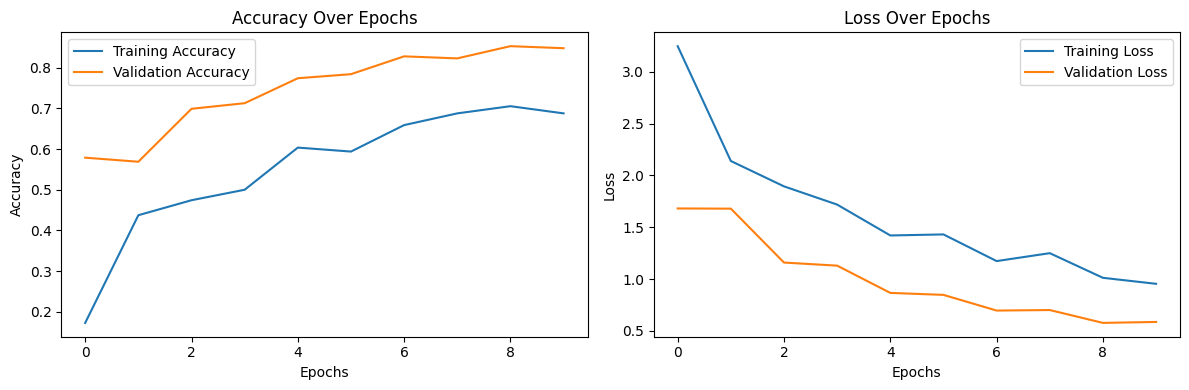

In [16]:
# Cellule 8 : Visualisation de l'accuracy et de la loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Cellule 9 : Évaluation du modèle sur le jeu de test
test_generator = val_datagen.flow_from_directory(
    path,  # Replace with your test data path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Found 829 images belonging to 30 classes.
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8592 - loss: 0.5527
Test Accuracy: 85.28%


#**X. Évaluation et Visualisation des Performances**

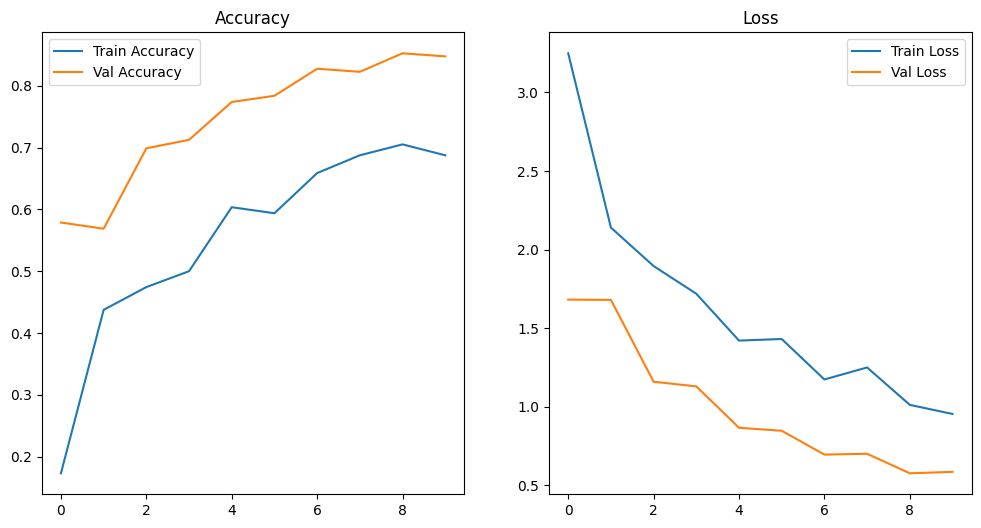

In [18]:
# Pour évaluer et visualiser les performances de mon modèle, j'ai tracé les courbes d'entraînement et de validation, telles que la perte et l'exactitude au fil des époques.

# Visualisation de l'accuracy et de la loss

def plot_history(history):
    # Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

# Affichage des courbes
plot_history(history)

In [24]:
# Créer le dossier 'model' s'il n'existe pas
os.makedirs('model', exist_ok=True)
# Cellule 10 : Sauvegarder le modèle
model.save('model/Mouhamed_agriculture_crop_classifier.keras')
print(df1.head())  # Affiche les 5 premières lignes pour vérifier la structure

     label                                               path  \
0  coconut  /content/drive/MyDrive/Agricultural-crops/coco...   
1  coconut  /content/drive/MyDrive/Agricultural-crops/coco...   
2  coconut  /content/drive/MyDrive/Agricultural-crops/coco...   
3  coconut  /content/drive/MyDrive/Agricultural-crops/coco...   
4  coconut  /content/drive/MyDrive/Agricultural-crops/coco...   

                                               image  
0  [[[0.01568627450980392, 0.2, 0.125490196078431...  
1  [[[0.9803921568627451, 0.9450980392156862, 0.9...  
2  [[[0.1568627450980392, 0.4, 0.3450980392156862...  
3  [[[0.8862745098039215, 0.5137254901960784, 0.2...  
4  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...  
